In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-sales/index.csv


In [2]:
df = pd.read_csv(os.path.join(dirname, filename))
df.tail(5)

,date,datetime,cash_type,card,money,coffee_name
1308,2024-08-17,2024-08-17 16:31:54.837,card,ANON-0000-0000-0277,23.02,Cortado
1309,2024-08-17,2024-08-17 16:33:48.977,card,ANON-0000-0000-0192,32.82,Latte
1310,2024-08-17,2024-08-17 18:48:58.852,card,ANON-0000-0000-0456,32.82,Cappuccino
1311,2024-08-17,2024-08-17 21:18:56.806,card,ANON-0000-0000-0040,27.92,Americano with Milk
1312,2024-08-17,2024-08-17 22:42:39.351,card,ANON-0000-0000-0519,32.82,Latte


In [3]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [4]:
df.nunique()

date            167
datetime       1313
cash_type         2
card            519
money            16
coffee_name       8
dtype: int64

In [5]:
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
df['day_of_week'] = df['date'].dt.dayofweek

In [6]:
df['day_of_week'] = df['day_of_week'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

In [7]:
df

,date,datetime,cash_type,card,money,coffee_name,day_of_week
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,Friday
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,Friday
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,Friday
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,Friday
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,Friday
...,...,...,...,...,...,...,...
1308,2024-08-17,2024-08-17 16:31:54.837,card,ANON-0000-0000-0277,23.02,Cortado,Saturday
1309,2024-08-17,2024-08-17 16:33:48.977,card,ANON-0000-0000-0192,32.82,Latte,Saturday
1310,2024-08-17,2024-08-17 18:48:58.852,card,ANON-0000-0000-0456,32.82,Cappuccino,Saturday
1311,2024-08-17,2024-08-17 21:18:56.806,card,ANON-0000-0000-0040,27.92,Americano with Milk,Saturday


#### What is the average amount of money spent on different types of coffee?

In [13]:
avg_spent_coffee = df.groupby('coffee_name')['money'].mean().reset_index()
avg_spent_coffee

,coffee_name,money
0,Americano,27.096541
1,Americano with Milk,31.429028
2,Cappuccino,36.875946
3,Cocoa,36.166364
4,Cortado,26.809431
5,Espresso,21.725763
6,Hot Chocolate,37.247848
7,Latte,36.486241


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Americano'),
  Text(1, 0, 'Americano with Milk'),
  Text(2, 0, 'Cappuccino'),
  Text(3, 0, 'Cocoa'),
  Text(4, 0, 'Cortado'),
  Text(5, 0, 'Espresso'),
  Text(6, 0, 'Hot Chocolate'),
  Text(7, 0, 'Latte')])

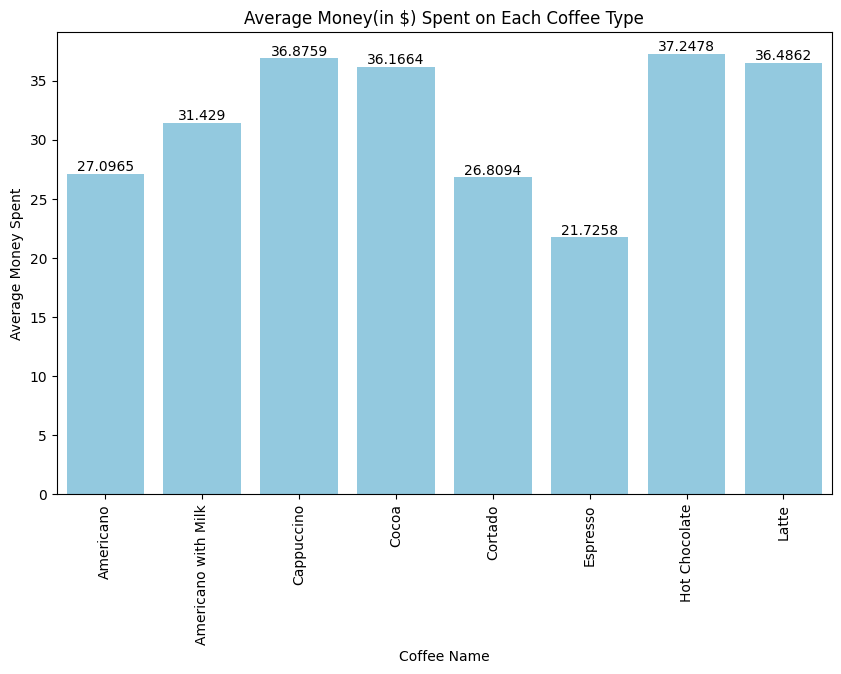

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=avg_spent_coffee, x='coffee_name', y='money', color = 'skyblue')
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Coffee Name')
plt.ylabel('Average Money Spent')
plt.title('Average Money(in $) Spent on Each Coffee Type')
plt.xticks(rotation=90)

In [23]:
payment_types = df.groupby('cash_type').size().reset_index(name = 'count')
payment_types

,cash_type,count
0,card,1224
1,cash,89


Text(0.5, 1.0, 'Count by Payment Type')

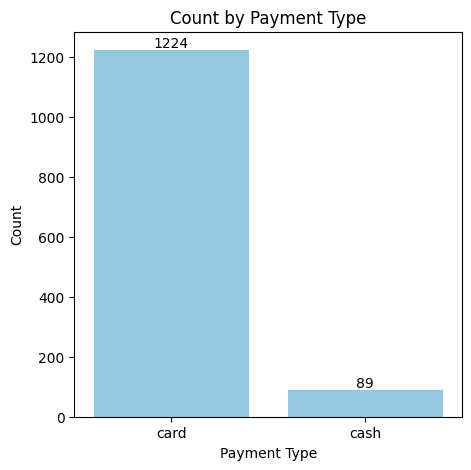

In [27]:
plt.figure(figsize=(5, 5))
ax = sns.barplot(data=payment_types, x='cash_type', y='count', color = 'skyblue')
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Count by Payment Type')


In [34]:
weekday_types = df.groupby('day_of_week').size().reset_index(name = 'count')
weekday_types

,day_of_week,count
0,Friday,181
1,Monday,177
2,Saturday,189
3,Sunday,172
4,Thursday,200
5,Tuesday,206
6,Wednesday,188


Text(0.5, 1.0, 'Coffee Sales by Day')

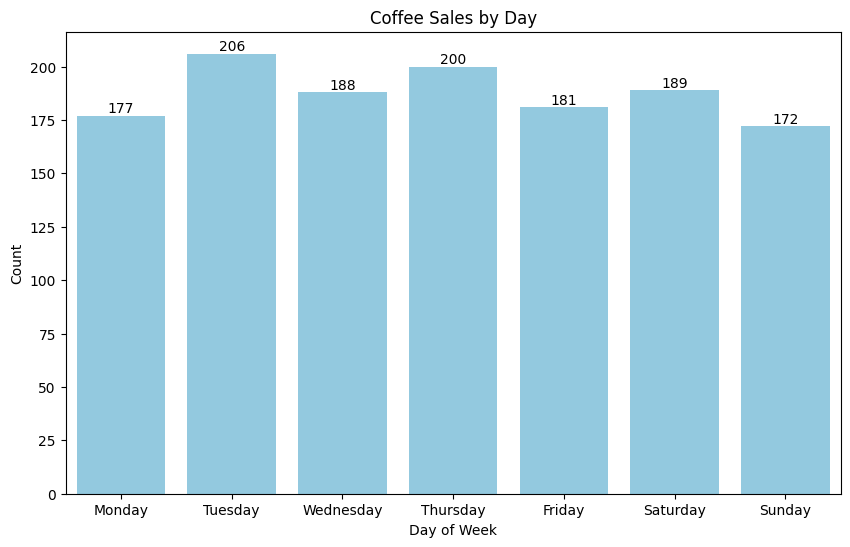

In [37]:
plt.figure(figsize=(10, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.barplot(data=weekday_types, x='day_of_week', y='count', color = 'skyblue', order = day_order)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Coffee Sales by Day')
